<a href="https://colab.research.google.com/github/Gastfigue/coderhouse/blob/main/Desafio_FeatureSelection_Rodriguez_Figueredo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Contexto**

El objetivo de este analisis es determinar el patron/variable que conlleva a los usuarios de la aerolinea  a estar o no satisfechos con el servicio recibido.  Se intentara responder las siguientes hipotesis/preguntas:
- El genero es una variable que influye en la satisfaccion del cliente?
- Las horas de vuelo tienen incidencia en la satisfaccion de cliente?
- La clase en la que vuelen sera un factor importante en la satisfaccion, a mejor clase mayor satisfacción?
- Existe un servicio que determine directamente la satisfacion o no del cliente?

 **Abstract:**

En el siguiente proyecto presentamos el dataset "Flights" con 23 variables y analiza mas de 100.000 viajeros aereos. Cuenta con variables de identificacion de los mismos como: el genero, que tipo de consumidor es (si cuenta con membresia Loyal o Disloyal), edad, motivo de viaje (viaje personal o por trabajo), el tipo de clase en la cual viajo (Eco, Eco Plus o Business) y la distancia del vuelo.
El mismo dataset tambien cuenta con una encuesta de satisfacción con puntajes del 0 al 5 en donde el viajero evalua los siguientes aspectos:
- Servicio de Wifi abordo
- Conveniencia del tiempo de arribo o partida del vuelo
- Facilidad al reservar de forma Online
- Ubicación de la puerta del vuelo
- Comida y bebida
- Abordaje del vuelo
- Comodidad del asiento
- Entretenimiento dentro del vuelo
- Servicio de abordaje al vuelo
- Espacio entre asientos (leg room)
- Manejo de equipaje
- Servicio de Check-in
- Servicio dentro del vuelo
- Limpieza

**Audiencia:** Aerolinea


**Analizar datos Tabulares**

- importamos liberias

In [ ]:
import pandas as pd #manipulacion de dataframe
import numpy as np #manipular arreglos (array)
import matplotlib.pyplot as plt #visualizaciones
import re # reemplazar espacios de las variables del dataset
import seaborn as sns #visualizaciones
import statsmodels.api as sm 
from sklearn import metrics # modulo para evaluar metricas del modelo
from sklearn.ensemble import RandomForestClassifier #Algoritmo para clasificacion
from sklearn.model_selection import train_test_split #separar datos para test y train
from sklearn.preprocessing import LabelEncoder # nos permite convertir las variables categorias a numeros, (Gender M/F a 0/1)


- Importamos el dataset directamente de Kaggle  (Es necesario tener en nuestra carpeta el token kaggle.json)

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction #ir a Kaggle y presionar en (...) luego Copy API command
!unzip /content/airline-passenger-satisfaction.zip #descomprimir archivo
df=pd.read_csv('train.csv') #Generamos el dataframe a partir del csv


-rw-r--r-- 1 root root 70 Mar  3 15:27 kaggle.json
/content
  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 166MB/s]
Archive:  /content/airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


**Data Wrangling**

1.   Detección de valores nulos
2.   Detección de valores duplicados
3.   Manejo de datos faltantes



- Deteccion de valores nulos

In [ ]:
pd.set_option("display.max_rows",None)
df_nulos=df.isnull().sum().sort_values(ascending=False)
df_nulos[df_nulos>0] 

Arrival Delay in Minutes    310
dtype: int64

- Detección de valores duplicados

In [ ]:
df_dup=(df.duplicated() == True).sum()
df_dup

0

- Manejo de datos faltantes

Comenzamos eliminando las columnas que no son utiles para el analisis en cuestion, y convertimos las propiedades de los datos desde integer a variables categoricas. De los 310 datos nulos antes presentados de la variable " Arrival Delay in Minutes" se reemplazaran por su media correspondiente, siendo la misma de 15.1786.

Dado que no existen valores duplicados no se aplican cambios y se modifican los espacios en blanco de las variables por el caracter "_", concluyendo asi el manejo de datos faltantes para comenzar el analisis descriptivo.

In [ ]:
df=df.drop(['Unnamed: 0','id'],axis=1) # Eliminar col Unnamed y id
l=[x for x in df.columns if x  in ['Gender','Customer Type','Type of Travel', 'Class', 'satisfaction']]
df[l]=df[l].astype('category') #Convertir variables tipo int a category
avg_norm_loss = df['Arrival Delay in Minutes'].astype("float").mean(axis=0) #Imputacion de datos nulos ***
df['Arrival Delay in Minutes'].replace(np.nan, avg_norm_loss, inplace=True)

#Cambiamos los espacios de las variables del dataset por "_"
for i in df.columns: 
  a=re.sub(r"\s+","_",i)
  df.rename(columns={i:a},inplace=True) 


**3. Modelos de Machine Learning**

In [ ]:
df_x=df.drop(['satisfaction'],axis=1)

Convertir variables categoricas a variables numericas, mediante el metodo get_dummies()

In [ ]:
df_dumies=pd.get_dummies(df_x, columns=['Gender','Customer_Type','Type_of_Travel','Class'])

Se estandarizan los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_dumies)
df_scaled=pd.DataFrame(df_scaled)

Mediante el modelo PCA nuetro objetivo es reducir el numero de las variables de nuestro data_frame manteniendo la mayor varianza posible pero creando variables que no esten correlacionadas.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3,random_state=12)
df_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(df_pca)

Graficamos la satisfacción de los clientes.

<AxesSubplot:xlabel='0', ylabel='1'>

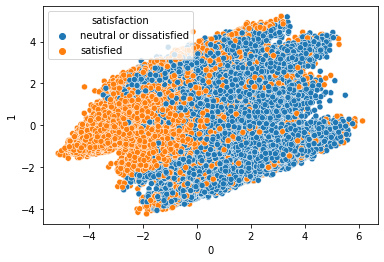

In [ ]:
sns.scatterplot(data=df_pca, x=0, y=1,hue=df.satisfaction)

In [ ]:
Agrupamos por cluster las variables creadas.

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, random_state=12)
df_fit=kmeans.fit_transform(df_pca)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En esta representacion podemos ver las dos variables con la menor cantidad de varianza agrupadas. A no confundir que estas son nuevas variables, no una seleccion de las anteriores, son componentes sinteticos nuevos.

<AxesSubplot:>

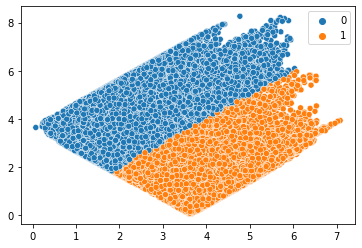

In [ ]:
sns.scatterplot(data=df_fit, x=df_fit[:,0], y=df_fit[:,1],hue=kmeans.labels_)

In [ ]:
for i in range(1,5):
  Kmeans= KMeans(n_clusters=i, random_state=12)
  kmeans.fit(df_pca)
  silueta= metrics.silhouette_score(df_pca, kmeans.labels_) 
  print(f'k {i} silueta={silueta}')

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k 1 silueta=0.4034609140084514


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k 2 silueta=0.4034609140084514


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k 3 silueta=0.4034609140084514


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k 4 silueta=0.4034609140084514
